In [94]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import griddata, UnivariateSpline
from matplotlib.pyplot import * # plotting library
import math
import pylab
from matplotlib import ticker
from mpmath import mp
from scipy.optimize import curve_fit  
import scipy
import mpmath
from numpy import random

In [62]:
m=40*1.66*1e-27
kb=1.38*1e-23
T=300

In [63]:
def DensityFunction(E, T):
    return 2*(kb* T)**(-3/2)*np.sqrt(E/np.pi)*np.exp(-E/(kb*T))

In [64]:
def EnergyGenerator(Ninput,Tinput):
    ekcut=10*kb*Tinput
    fmax=(2.0/math.pi)**0.5*(1.0/(kb*Tinput))*(math.e**(-0.5)) # The maximum for f(E_k) which we use as the height for the uniform envelope
    ekoutput=list(range(Ninput))
    ii=0
    while ii<Ninput:
        rx=np.random.uniform(0,ekcut)
        ry=np.random.uniform(0,fmax)
        if ry<DensityFunction(rx,Tinput):
            ekoutput[ii]=rx
            ii+=1
            
    return ekoutput

In [65]:
npar = 400
ek = EnergyGenerator(npar, T)

In [66]:
xfit=np.arange(0, 5e-20, 1e-21)
yfit = DensityFunction(xfit, T)

Text(0, 0.5, '$f(E_k)$')

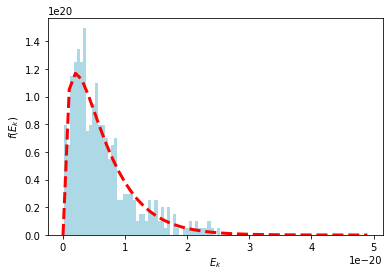

In [67]:
plt.hist(ek, 50, density=True, facecolor='lightblue')
plot(xfit,yfit,'--',lw=3, color='r')

plt.xlabel('$E_k$')
plt.ylabel('$f(E_k)$')
#plt.text(60, .025)
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)

In [68]:
def Likelihood_1(E, T):
    LF=1
    for i in range(len(E)):
        LF*=DensityFunction(E[i],T)
        # print(LF)
    return LF

Likelihood_1(ek, T)

<ipython-input-68-288281429b74>:4: RuntimeWarning: overflow encountered in double_scalars
  LF*=DensityFunction(E[i],T)


inf

In [69]:
def Likelihood_2(E, T):
    LF=0
    for i in range(len(E)):
        LF+=np.log(DensityFunction(E[i],T))
        # print(LF)
    return -LF

Likelihood_2(ek, 300)

-18231.166885085662

-18231.184049688534 302


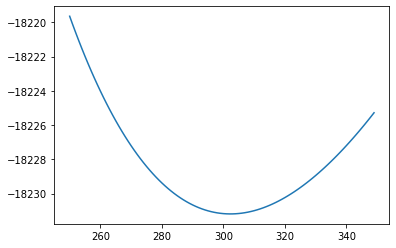

In [73]:
T_array=np.arange(250, 350, 1)

L=np.empty(len(T_array), dtype=object)

for j in range(len(T_array)):
    L[j] = Likelihood_2(ek, T_array[j])

plt.plot(T_array, L)
min_index=np.argmin(L)
print(min(L), T_array[min_index])

In [83]:
def Estimate(T_estimate, T, Nbins, npar):
    T_data = np.empty(Nbins, dtype=object)
    for i in range(Nbins):
        E_estimate = EnergyGenerator(npar, T)
        LF = Likelihood_2(E_estimate, T_estimate)
        min_index=np.argmin(LF)
        T_data[i] = T_estimate[min_index]

    return T_data

In [132]:
N_exp=200
npar = 1000

T_hist=Estimate(T_array, T, N_exp, npar)

Text(0, 0.5, '#')

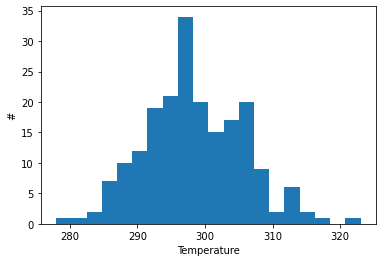

In [133]:
plt.hist(T_hist, bins=20)
plt.xlabel('Temperature')
plt.ylabel('#')

In [96]:
def gauss(x, mu, sigma):
    A = 1/sigma/np.sqrt(2*np.pi)
    return A * np.exp(- (x - mu)**2 / 2 / sigma**2)

The mean Temperature is  298.02 [K], and the standard deviation is  7.32


Text(0, 0.5, '#')

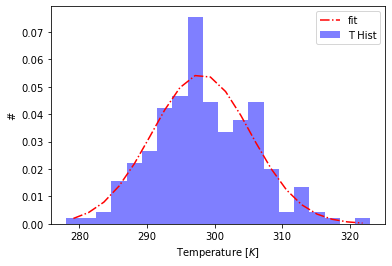

In [134]:
bin_entries, bin_edges, _ = plt.hist(T_hist, bins=20, density=True, color='blue', alpha = 0.5, label='T Hist')
bin_centers = np.array([0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)])


popt, pcov = scipy.optimize.curve_fit(gauss, bin_centers, bin_entries,bounds=([280, 2], [320, 50]))
binfit=gauss(bin_centers, *popt)

plt.plot(bin_centers, binfit, 'r-.', label='fit')
print('The mean Temperature is ', round(popt[0], 2), '[K], and the standard deviation is ', round(popt[1],2))
plt.legend()
plt.xlabel('Temperature $[K]$')
plt.ylabel('#')

the error is 11.0


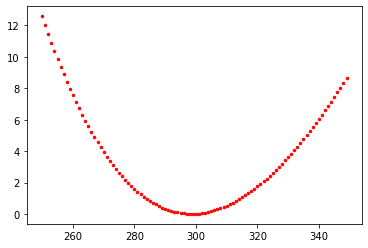

In [131]:
# Answer 7-5
npar=500

nL=len(T_array)

L=np.empty(nL, dtype=object)
ek=EnergyGenerator(npar,T)

for i in range(0,nL):
    L[i]=Likelihood_2(ek,T_array[i])

imin=np.argmin(L)
Lmin=L[imin]
for i in range(0,nL):
    L[i]-=Lmin

i1=0
i2=0
for i in range(0,nL-1):
    if L[i]>0.5 and L[i+1]<0.5:
        i1=i
    if L[i]<0.5 and L[i+1]>0.5:
        i2=i

Err_Estimate=(T_array[i2]-T_array[i1])/2

plt.plot(T_array, L,'r.',ms=5,lw=1)

print('the error is',  Err_Estimate)

In [ ]:
#7-6